----

# **Applying Support Vector Machines**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

## **Heart Dataset**

| Feature    | Description                                                                                          |
|------------|------------------------------------------------------------------------------------------------------|
| **Age**    | Age of the individual (in years).                                                                    |
| **Sex**    | Gender of the individual (1 = male, 0 = female).                                                    |
| **ChestPain** | Type of chest pain experienced (typical, asymptomatic, nonanginal, nontypical).                  |
| **RestBP** | Resting blood pressure (in mm Hg).                                                                   |
| **Chol**   | Serum cholesterol level (in mg/dl).                                                                  |
| **Fbs**    | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).                                              |
| **RestECG**| Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing left ventricular hypertrophy). |
| **MaxHR**  | Maximum heart rate achieved during the test.                                                         |
| **ExAng**  | Exercise angina (1 = yes, 0 = no).                                                                   |
| **Oldpeak**| ST depression induced by exercise relative to rest (a measure of heart stress).                      |
| **Slope**  | Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).                   |
| **Ca**     | Number of major vessels (0-3) colored by fluoroscopy.                                               |
| **Thal**   | Thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect).                                 |
| **AHD**    | Diagnosis of heart disease (Yes = presence of heart disease, No = absence of heart disease).         |

This dataset relate to heart disease, with various features that may contribute to the diagnosis of angina or other heart conditions.

### **Import Libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

### **Read Dataset**

In [30]:
df = pd.read_csv('/content/heart.csv')

### **First 5 Rows of Dataset**

In [31]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### **Information of Dataset**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


### **Check Missing Values**

In [33]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


- Missing values are present in `Thal` and `Ca`.

- Let's deal with it.





### **Impute Missing Values**

In [34]:
df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])
df['Ca'] = df['Ca'].fillna(df['Ca'].mode()[0])

### **Statistical Description of Numerical Features**

In [35]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


### **Visualize Relationship Between Age and Cholestrol**

<Axes: xlabel='Age', ylabel='Chol'>

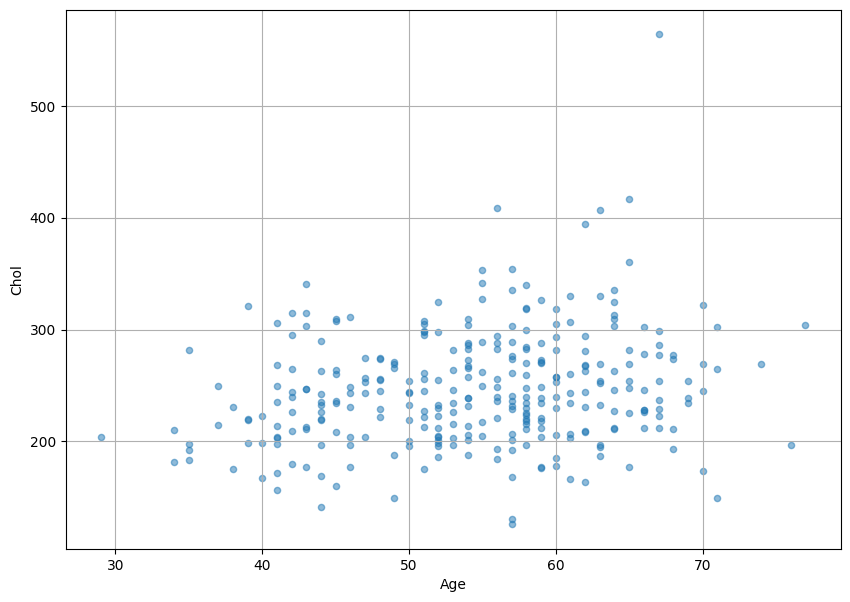

In [36]:
df.plot(kind='scatter',x='Age', y='Chol', alpha=0.5, figsize=(10,7), grid=True)

- Plot claerly illustrates as age increase the cholestrol also increases.

### **Creating Dummy Variable of Catagorical Coulmns**

In [37]:
df_new = pd.get_dummies(df, columns=['ChestPain', 'Thal'],drop_first=True)

In [38]:
df_new.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,No,False,False,True,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,False,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,False,False,False,False,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,No,True,False,False,True,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,No,False,True,False,True,False


### **Creating Dependent and Independent Variables**

In [39]:
X = df_new.drop('AHD', axis=1)
y = df_new['AHD']

### **Splitting Data into Train and Test**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### **Fitting SVC Using GridSearch CV**

In [41]:
model = SVC()

param_grid = {'C' : [1,10,100,1000], 'gamma' : [1,0.1,0.01,0.001], 'kernel' : ['rbf']}

grid = GridSearchCV(model, param_grid, verbose=1, n_jobs=1, refit=True, cv=5)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


### **Best Parameter**

In [42]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


### **Evaluate the model**

In [43]:
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5934065934065934


<Axes: >

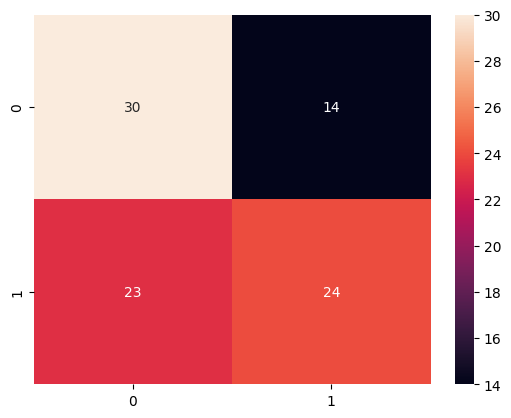

In [44]:
# plot confusion matrix
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [45]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.57      0.68      0.62        44
         Yes       0.63      0.51      0.56        47

    accuracy                           0.59        91
   macro avg       0.60      0.60      0.59        91
weighted avg       0.60      0.59      0.59        91



### **Let's fit with best parameters**

In [46]:
# Create the model with the best parameters
model = SVC(C=10, gamma=0.001, kernel='rbf')

In [47]:
# Fit the model
model.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [48]:
# Make predictions
y_pred = model.predict(X_test)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.66


In [52]:
# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

          No       0.62      0.77      0.69        44
         Yes       0.72      0.55      0.63        47

    accuracy                           0.66        91
   macro avg       0.67      0.66      0.66        91
weighted avg       0.67      0.66      0.66        91



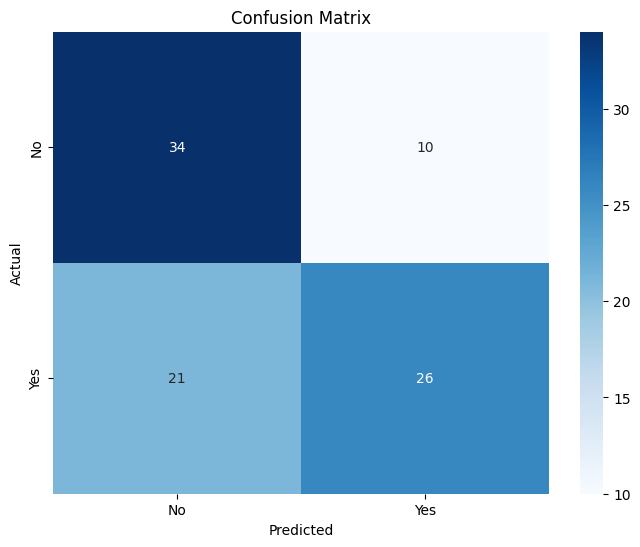

In [53]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()